In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",200)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
#plt.style.use('ggplot')
#import math

In [130]:
#import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",200)
#plt.style.use('ggplot')
#import math

In [131]:
url = 'https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv'

In [132]:
#Assign Dataset to variables
df = pd.read_csv(url)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Week 1: Data Exploration

1. Explore dataset dimensions
2. Check for missing values.
3. Perform data type conversions as needed.
4. Analyze "Aggregate rating" distribution.
5. Address any class imbalances.
6. Calculate statistics for numerical columns
7. Explore categorical variables, Identify top 5 cuisines and cities

In [133]:
#Dataset Dimension
df.shape

(9551, 21)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [135]:
#checking dtypes
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [136]:
#check for missing values
df.isna().sum().sort_values(ascending = False)

Cuisines                9
Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
Votes                   0
dtype: int64

In [137]:
#checking the percentage of the missing values
((df.isna().sum().sort_values(ascending = False))/len(df))*100

Cuisines                0.094231
Restaurant ID           0.000000
Currency                0.000000
Rating text             0.000000
Rating color            0.000000
Aggregate rating        0.000000
Price range             0.000000
Switch to order menu    0.000000
Is delivering now       0.000000
Has Online delivery     0.000000
Has Table booking       0.000000
Average Cost for two    0.000000
Restaurant Name         0.000000
Latitude                0.000000
Longitude               0.000000
Locality Verbose        0.000000
Locality                0.000000
Address                 0.000000
City                    0.000000
Country Code            0.000000
Votes                   0.000000
dtype: float64

##### Observations
1. The data contains 9551 values with 21 columns
2. 9 missing rows at Cuisines which is less than 1% of the missing data
3. All data types are correct, therefore no need for data types conversion

Note: There will be need to drop the cuisine column, because it is not up to 5% of missing values, so there will be no need for that column

In [138]:
df['Aggregate rating'].nlargest(10)

3      4.9
8      4.9
10     4.9
39     4.9
48     4.9
50     4.9
124    4.9
175    4.9
213    4.9
235    4.9
Name: Aggregate rating, dtype: float64

Text(0.5, 1.0, 'Aggregate Rating Distribution')

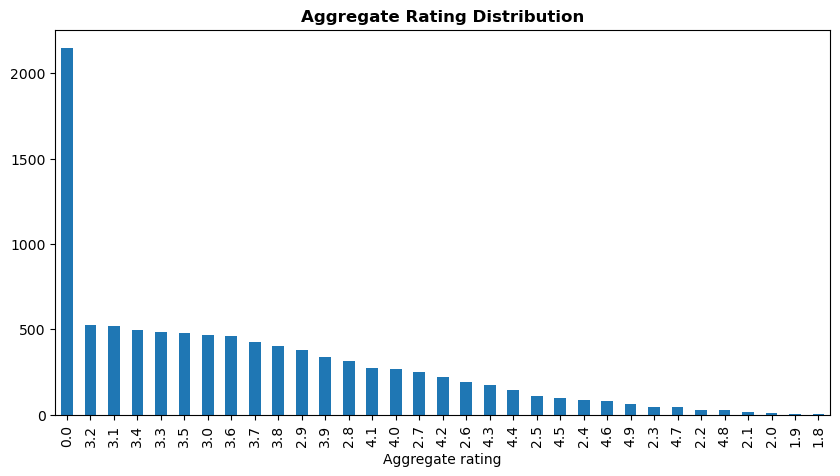

In [139]:
#Check for the distribution of the Target features
df['Aggregate rating'].value_counts(ascending= False).plot(kind = 'bar', figsize = (10,5))
plt.title("Aggregate Rating Distribution", fontweight = 'bold')

### Observation
Notice that majority of people do not rate the company in some city/countries, and this has led to skewed data. 
### Outlier(Skewed) data is challenging for machine learning for several reasons.
1. Biased Models: Machine learning models optimize balanced metrics or functions by default. Hence, imbalanced data can lead to biased trained models that tend to predict the majority class more accurately while neglecting the minority class. This can result in a high false negative rate, where the minority class is misclassified as the majority class.
2. Skewed Class Distribution: Imbalanced data show a skewed class distribution, where the majority class dominates the dataset. This can lead to a lack of diversity in the data and make it difficult for the model to learn the underlying patterns of the minority class.
3. Differing Cost of Misclassification Errors: Another challenge with imbalanced data is that misclassification errors can have varying costs depending on the application. For example, a false negative can be life-threatening in medical diagnoses, while a false positive may only cause inconvenience.

In [140]:
#Checking the Statistical Analysis of all the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


### Observation
It looks like the votes features has some outlier present

In [141]:
#Top 5 cuisine and cities
cat = df.loc[:, ['Cuisines', 'City']]
cat.head()

,Cuisines,City
0,"French, Japanese, Desserts",Makati City
1,Japanese,Makati City
2,"Seafood, Asian, Filipino, Indian",Mandaluyong City
3,"Japanese, Sushi",Mandaluyong City
4,"Japanese, Korean",Mandaluyong City


In [142]:
cat_=cat.assign(Cuisines = cat['Cuisines'].str.split(", ")).explode('Cuisines').reset_index(drop=True)

In [143]:
cat_['City'].value_counts().head(10)

City
New Delhi    10888
Gurgaon       2393
Noida         2180
Faridabad      499
Jaipur          76
Ahmedabad       76
Mumbai          76
Pretoria        74
Chennai         62
Pune            60
Name: count, dtype: int64

In [144]:
cat_.head()

,Cuisines,City
0,French,Makati City
1,Japanese,Makati City
2,Desserts,Makati City
3,Japanese,Makati City
4,Seafood,Mandaluyong City


In [145]:
cat_var= cat_.select_dtypes('object').columns

In [146]:
cat_var

Index(['Cuisines', 'City'], dtype='object')

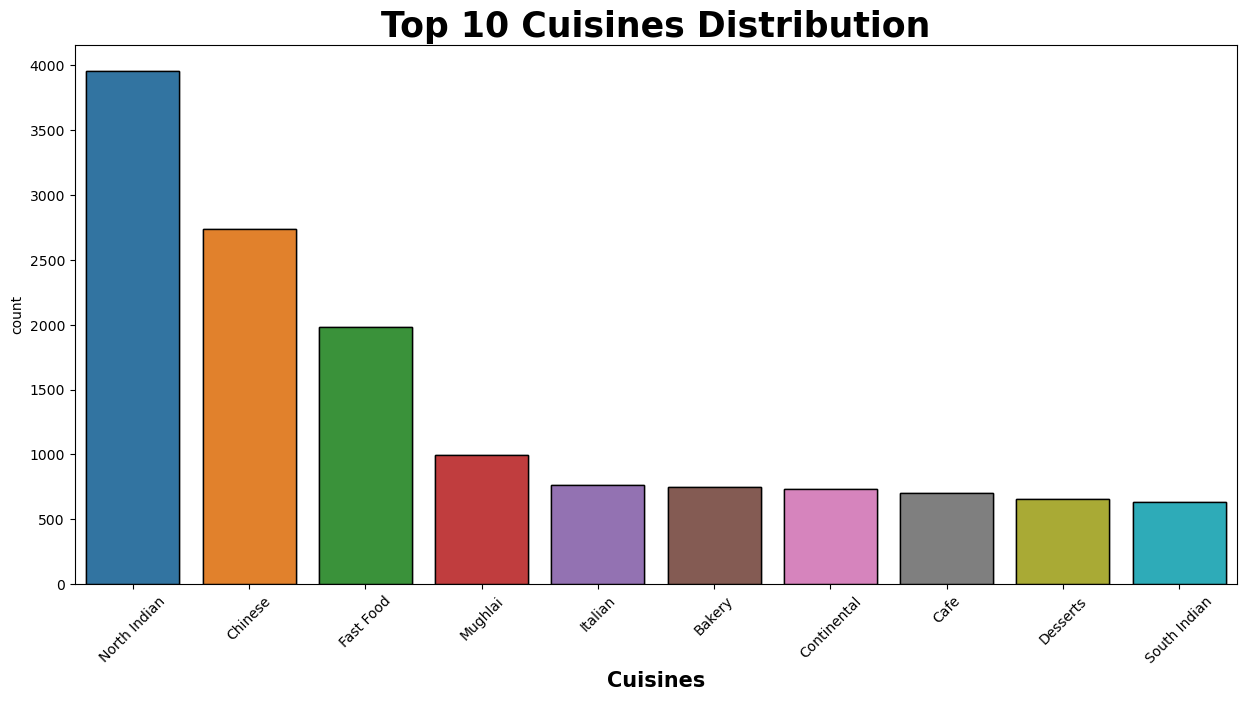

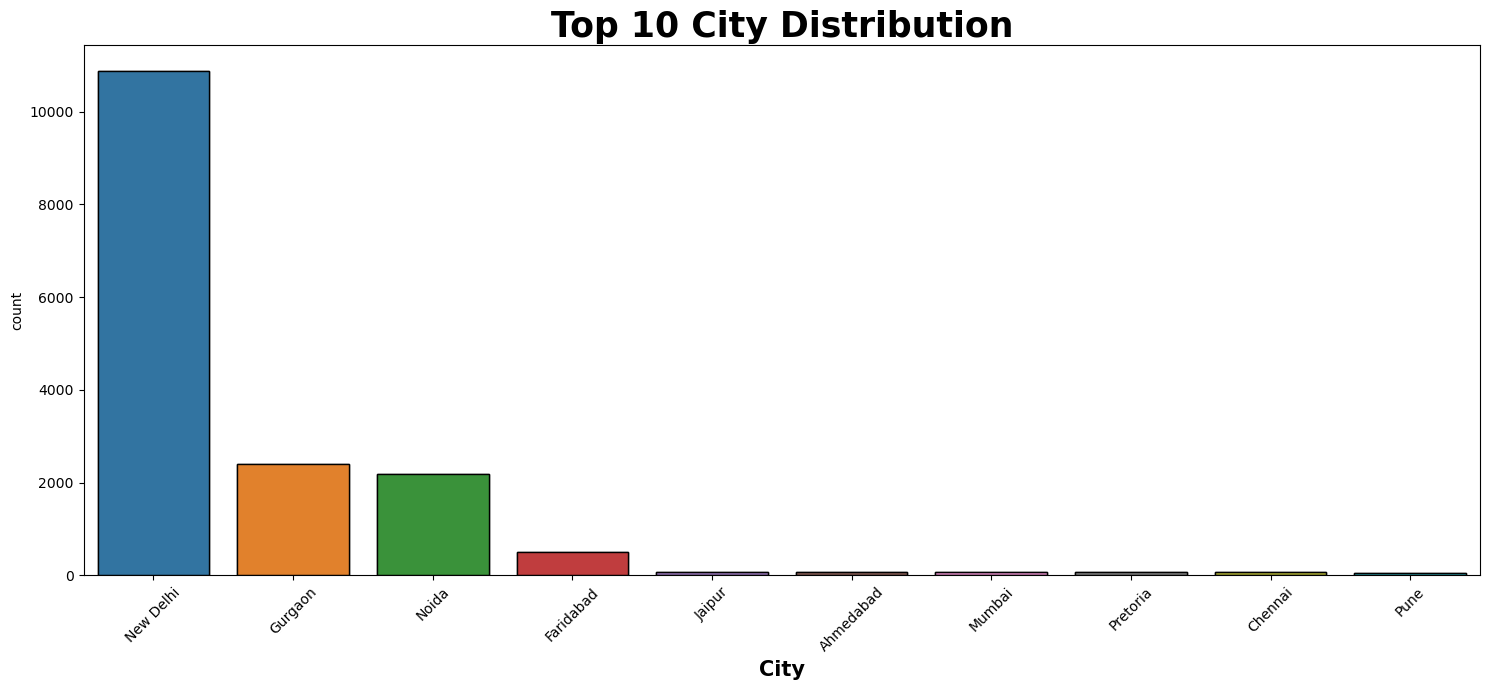

In [147]:
for col in cat_var:
    plt.figure(figsize = (15,7))
    plt.subplot(1,1,1)
    plt.title(f'Top 10 {col} Distibution', fontweight = 'bold', fontsize = 25)
    sns.countplot(data = cat_, x = col, order = cat_[col].value_counts().head(10).index, edgecolor = 'black')
    plt.xlabel(col, fontweight = 'bold', fontsize = 15)
    plt.xticks(rotation = 45)
    
    plt.subplot(1,1,1)
    sns.countplot(data = cat_, x = col, order = cat_[col].value_counts().head(10).index, edgecolor = 'black')
    plt.title(f'Top 10 {col} Distribution', fontweight = 'bold', fontsize = 25)

plt.tight_layout()
plt.show()

### Observations:
1. For the Cuisines, North India cuisine has the count followed by north India, chinese
2. For the Cities, New Delhi has the most count, meaning most sales comes from new Dehli

## WEEK 2: Data Visualization 
1. Compare average ratings across cuisines and cities.
2. Map restaurant locations using coordinates. 
3. Analyze distribution across cities. 
4. Correlate location with ratings.
5. Identify outliers and their effects. 
6. Determine relationship between votes and ratings.

### Exploding Cuisine column

In [148]:
#Unpivoting the column
df_explode = df
df_explode = df_explode.assign(Cuisines = df_explode['Cuisines'].str.split(", ", regex =False)).explode('Cuisines').reset_index(drop=True)
df_explode['Cuisines'] = df_explode['Cuisines'].str.strip()

#Unpivoting the column
#df_explode = df
#df_explode['Cuisines'] = df_explode['Cuisines'].str.split(", ", regex= False).explode('Cuisines')
#df_explode['Cuisines'] = df_explode['Cuisines'].str.strip()
#df_drop=df.assign(Cuisines = df['Cuisines'].str.split(", ")).explode('Cuisines').reset_index(drop = True)
#df_drop["Cuisines"]=df_drop["Cuisines"].str.strip()
#df

In [149]:
#Create a variable to store the cuisines and city
categories = [
    ('Cuisines' , 'Average rating Vs Cuisines', 5),
    ('City' , 'Average rating Vs Cities', 5),
]

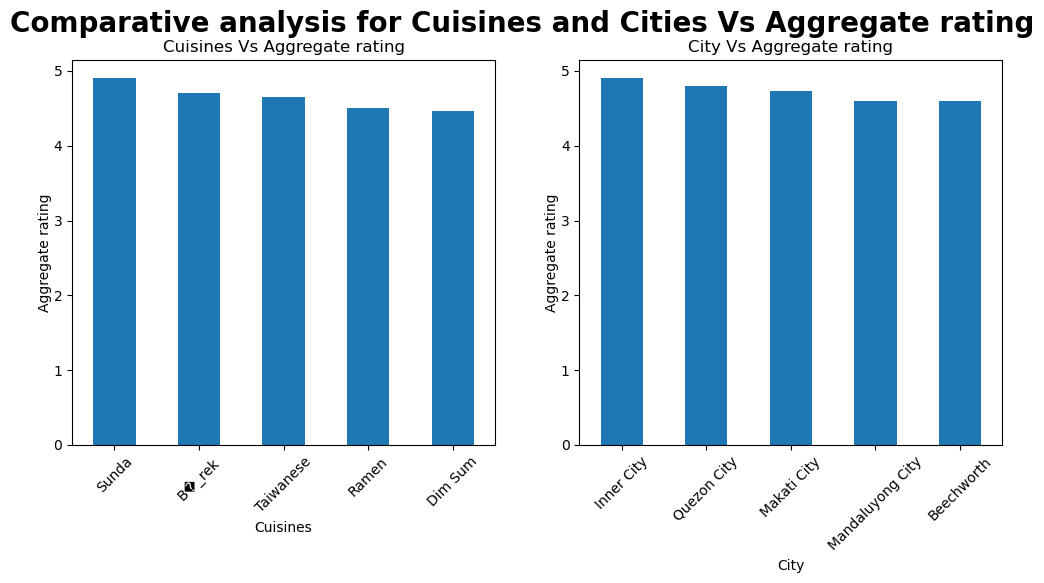

In [150]:
#Plotting the average rating accross cuisines and cities through looping
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize =(12,5))
axis = axes.flatten()
plt.suptitle('Comparative analysis for Cuisines and Cities Vs Aggregate rating', fontsize = 20, fontweight = 'bold')

for i,(category, title, top_n )in enumerate(categories):
    ax = axis[i]
    grouped_val = df_explode.groupby(category)['Aggregate rating'].mean().sort_values(ascending = False)
    if top_n:
        grouped_val = grouped_val.head(5)
    grouped_val.plot.bar(ax = ax)
    ax.set_title(f'{category} Vs Aggregate rating')
    ax.set_ylabel("Aggregate rating", labelpad = True)
    ax.tick_params(axis = 'x', rotation = 45)

### Observaitions 
1. For the Cuisines: "Italian, Deli" has the highest Average rating 
2. For the City: "Inner City" has the highest Average rating 

In [152]:
df_explode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         19719 non-null  int64  
 1   Restaurant Name       19719 non-null  object 
 2   Country Code          19719 non-null  int64  
 3   City                  19719 non-null  object 
 4   Address               19719 non-null  object 
 5   Locality              19719 non-null  object 
 6   Locality Verbose      19719 non-null  object 
 7   Longitude             19719 non-null  float64
 8   Latitude              19719 non-null  float64
 9   Cuisines              19710 non-null  object 
 10  Average Cost for two  19719 non-null  int64  
 11  Currency              19719 non-null  object 
 12  Has Table booking     19719 non-null  object 
 13  Has Online delivery   19719 non-null  object 
 14  Is delivering now     19719 non-null  object 
 15  Switch to order men

In [153]:
#Identify outliers and their effects.
#seperating the numerical columns and the categorical columns 
num_cols = df.select_dtypes(np.number).columns
cat_cols = df.select_dtypes('object').columns

In [11]:
print(f'The numerical Columns : {num_cols} \n')
print(f'The Categorical Columns : {cat_cols}')

The numerical Columns : Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object') 

The Categorical Columns : Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


Restaurant ID = 0.061569976479250714
Skewness: 0.061569976479250714 
Country Code = 3.043965346403779
Skewness: 3.043965346403779 
Longitude = -2.8073278338140857
Skewness: -2.8073278338140857 
Latitude = -3.08163535060857
Skewness: -3.08163535060857 
Average Cost for two = 35.477914900871276
Skewness: 35.477914900871276 
Price range = 0.8896175931442
Skewness: 0.8896175931442 
Aggregate rating = -0.9541304733200109
Skewness: -0.9541304733200109 
Votes = 8.807636687709472
Skewness: 8.807636687709472 


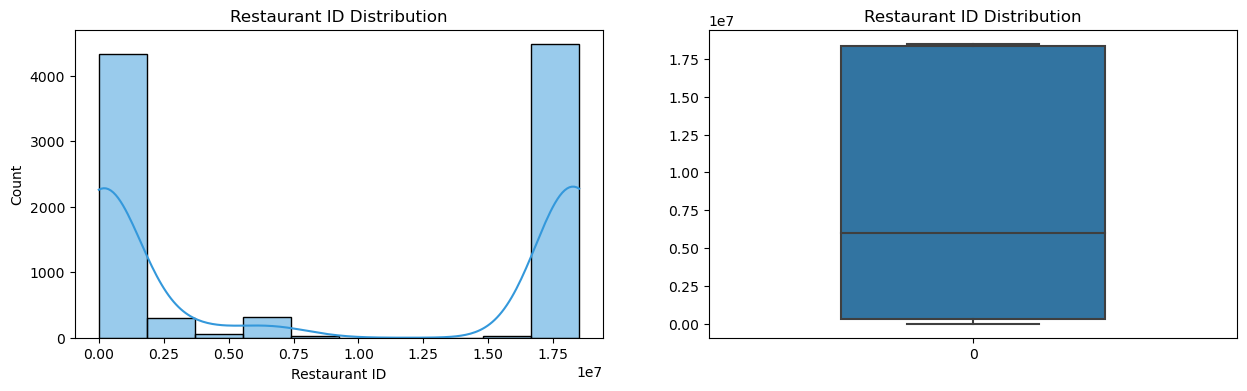

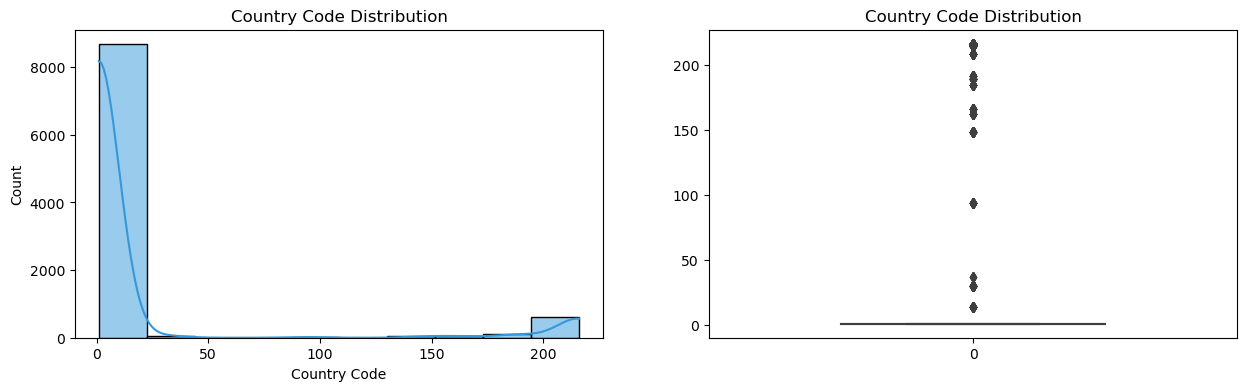

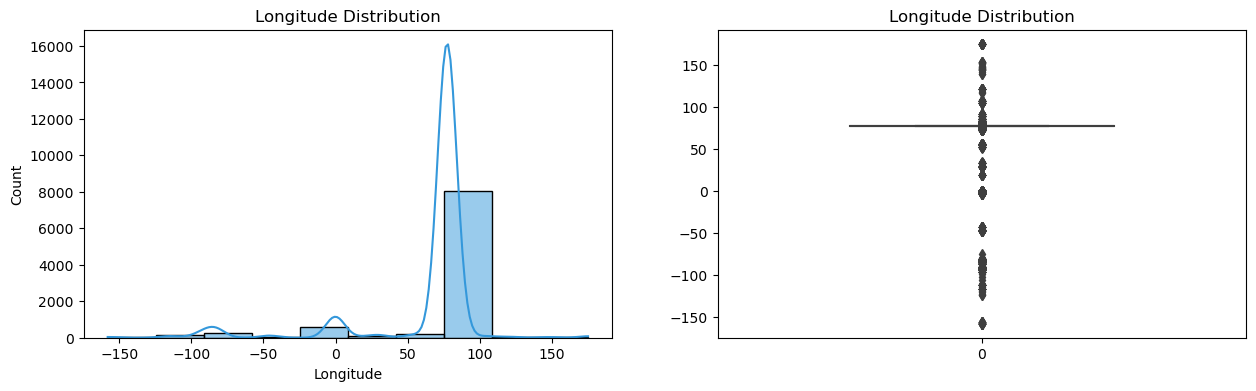

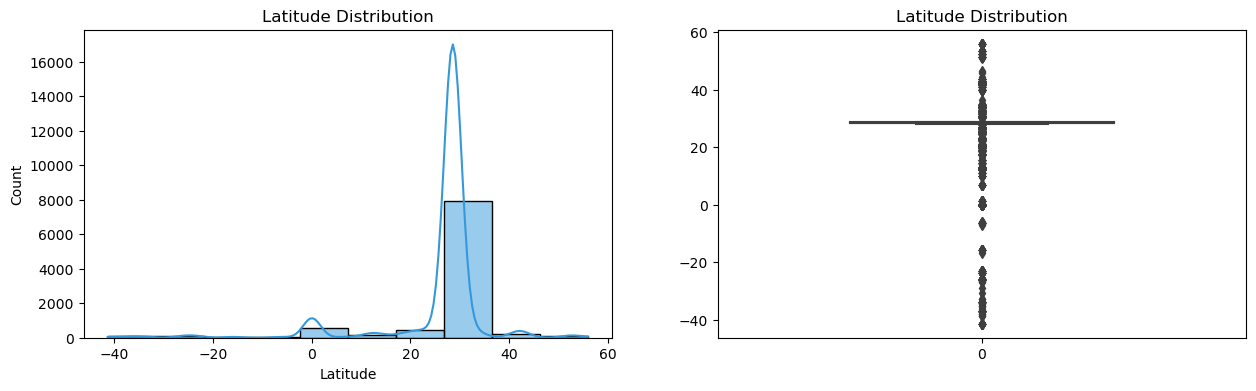

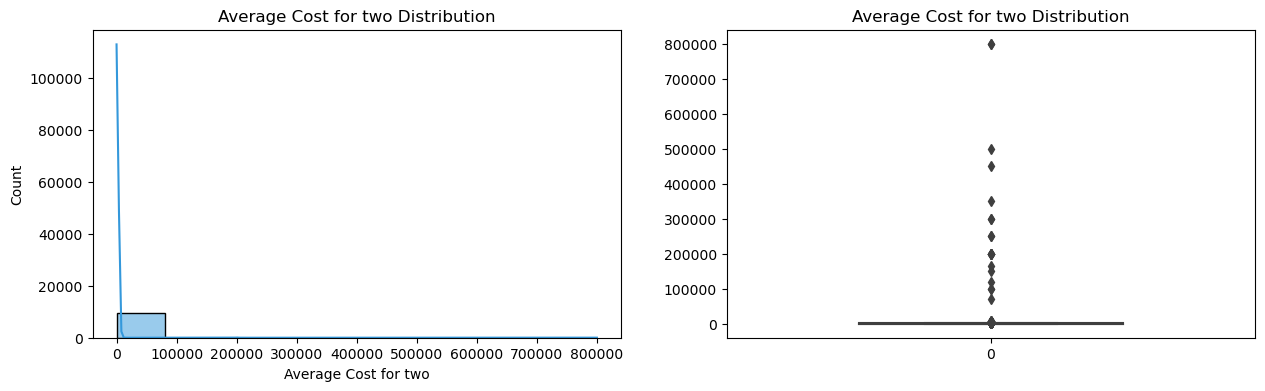

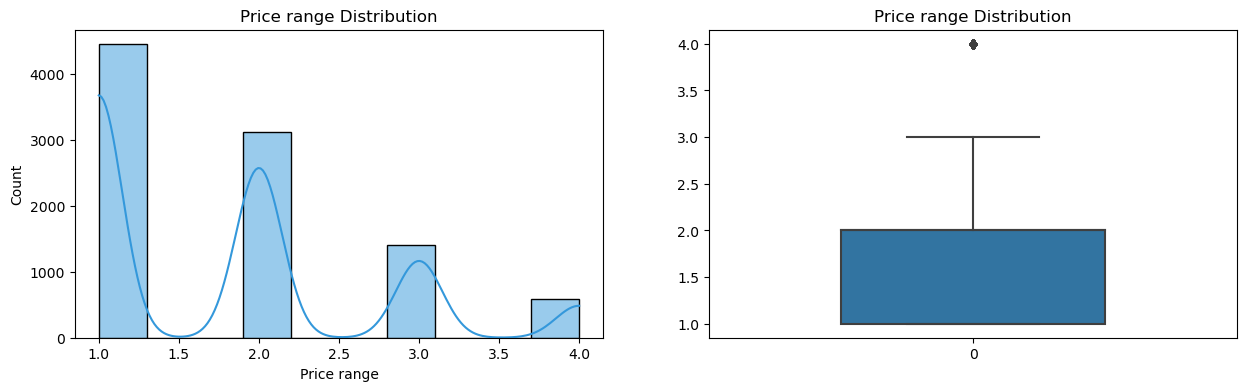

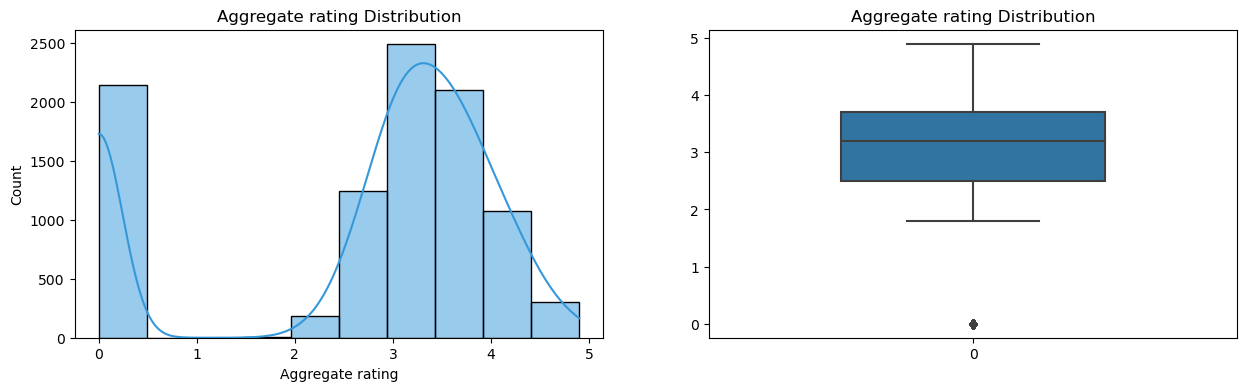

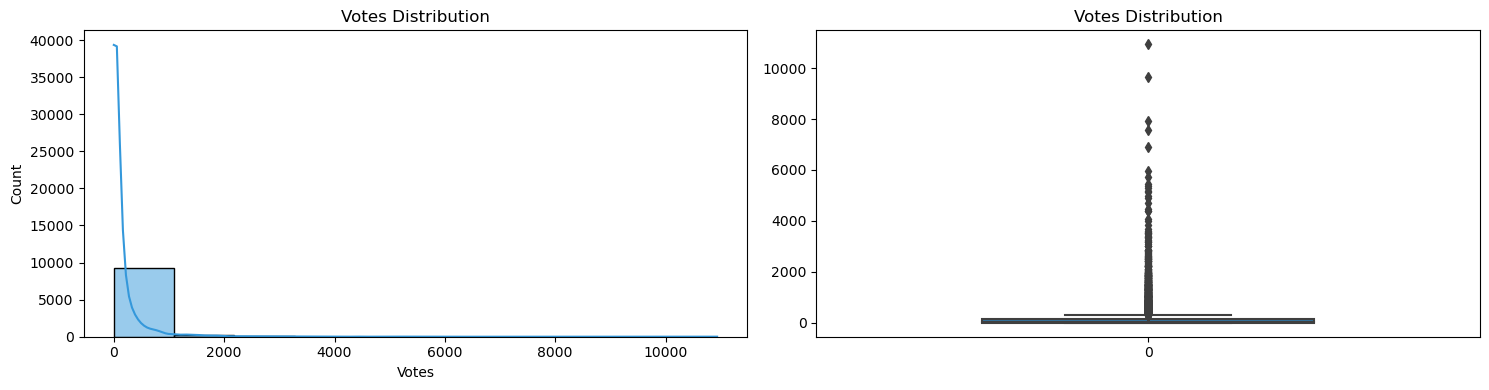

In [12]:
#Plotting using histogram and boxplot to know the distribution for each of the numerical columns
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} = {skewness}')
    #size of the plot
    plt.figure(figsize = (15,4))
    #Creating the dimensions for plt
    plt.subplot(1,2,1)
    plt.title(f'{col} Distribution')
    #creating the plot
    sns.histplot(df[col], kde = True, bins = 10, color="#3498db", edgecolor="black", legend = True)
    plt.xlabel(col)
    
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col], width=0.5)
    plt.title(f'{col} Distribution')
    print(f'Skewness: {skewness} ')
plt.tight_layout()
plt.show()

### Observation
##### From the skewed value i can see that:
    1. "Average Cost of two values" = 35.477914900871276 = Highly skewed
    2. "Aggregate rating" = -0.9541304733200109 = Highly Skewed
    3. "Votes Distribution" = 8.807636687709472 = Highly Skewed
    4. "Longitude Distribution"= -2.8073278338140857 = Highly Skewed
    5. "Latitude Distribution" = -3.08163535060857 = Highly Skewed

In [13]:
# Too Handle this skewed value we need to check their correlation to the Target Variable "Target Column"
corr_val = df[num_cols].corr()
corr_val.T

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


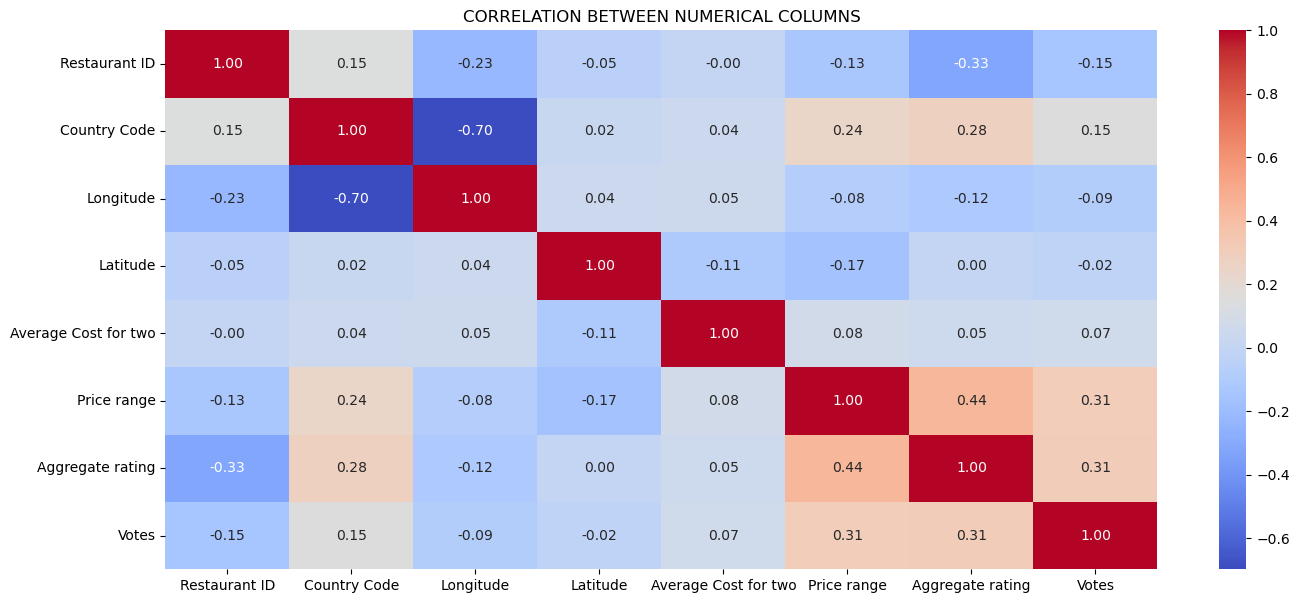

In [14]:
#plotting the heatmap to see their correlation before handling their skewness
plt.figure(figsize = (16,7))

sns.heatmap(corr_val, annot= True, cmap = 'coolwarm', fmt= '.2f')

plt.title('CORRELATION BETWEEN NUMERICAL COLUMNS')


plt.show()

### Observations
##### Remember We want to check for the correlated value to the target feature
       1. Country code has a weak correlation and might not be needed.
       2. price range is moderately correlated to the target column.
       3. votes as well is moderately correlated to the target column. 
So we would need to handle the skewed predictors that are correlated to the target columns

#### HANDLING SKEWNESS FOR TARGET COLUMN

In [154]:
rating_counts = df['Aggregate rating'].value_counts().sort_values(ascending = False).reset_index()
rating_counts.head()

,Aggregate rating,count
0,0.0,2148
1,3.2,522
2,3.1,519
3,3.4,498
4,3.3,483


In [155]:
df['Aggregate_log'] = np.log(df['Aggregate rating'])

log_skew = df['Aggregate_log'].skew()
log_skew

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

In [156]:
df['Aggregate_log_rate'] = np.log1p(df['Aggregate rating'])
df['Aggregate_sqrt_rate'] = np.sqrt(df['Aggregate rating'])

Log_skew = df['Aggregate_log_rate'].skew()
sqrt_skew = df['Aggregate_sqrt_rate'].skew()

print(f'Skewness of Log Rating: {Log_skew}\n Skeness of Square root Rating: {sqrt_skew}')


Skewness of Log Rating: -1.2102326916677104
 Skeness of Square root Rating: -1.2180856619500915


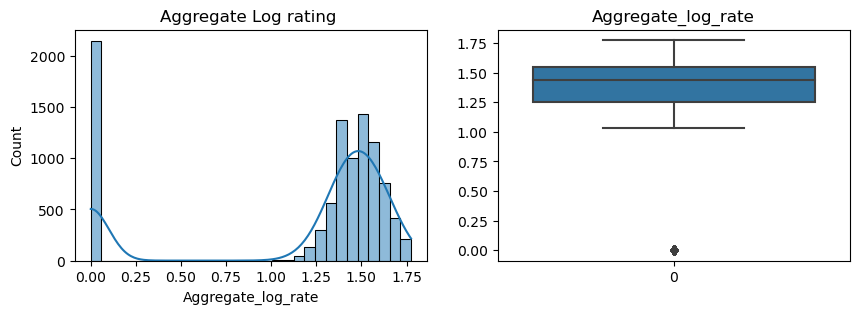

In [157]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(df['Aggregate_log_rate'], kde = True, bins =30)
plt.title('Aggregate Log rating ')

plt.subplot(1,2,2)
sns.boxplot(df['Aggregate_log_rate'])
plt.title('Aggregate_log_rate')
plt.show()

### Observations
1. Excess of 0's present in the features "Aggregate rating 0's" = 2148, this could lead to a bias in the predictive model if not handled correctly. 
2. Normal Log transformation was not able to perform the transformation, the skewness output of 'Aggregate_log' displays = inf(infinity)/nan. 
3. Original skewness of Aggregate rating without the transformation  = -0.9541304733200109
4. Comparing the log(1+p) and the square root transformation to see which skewness looks better
    1. log(1+p) = -1.2102326916677104 (Highly Skewed)
    2. Squrt = -1.2180856619500915 (Highly skewed)
5. Looking at all the skewness there will be need to try all results in the model training to see which of all has the best result.
6. Newly added features could have an impact on the momdel performance

#### HANDLING SKEWNESS FOR PREDICTORS

In [187]:
#Handling skewness for both the votes and the Price
df_explode['vote_log'] = np.log1p(df_explode['Votes'])
df_explode['Price_log'] = np.log(df_explode['Price range']) 
df_explode['Price_per_person'] = np.log1p(df_explode['Price per person'])
df_explode['City_Avg_Rating_log'] = np.log(df_explode['City_Avg_Rating'])
df_explode['Cuisine_frequency_log'] = np.log(df_explode['Cuisine frequency'])
df_explode['Cuisine_target_log'] = np.log1p(df_explode['Cuisine target'])
#df['Restaurant_name_log'] = np.log1p(df['Restaurant_name'])
#df['Locality_target_log'] = np.log1p(df['Locality_target'])
df_explode['Total_Reviews_log'] = np.log1p(df_explode['Total_Reviews'])


vote_skew = df_explode['vote_log'].skew()
price_skew = df_explode['Price_log'].skew()
Price_per_person =  df_explode['Price_per_person'].skew()
City_Avg_Rating_log = df_explode['City_Avg_Rating_log'].skew()
Cuisine_frequency_log = df_explode['Cuisine_frequency_log'].skew()
#Restaurant_name_log = df['Restaurant_name_log'].skew()
#Locality_target_log = df['Locality_target_log'].skew()
Total_reviews_log = df_explode['Total_Reviews_log'].skew()

print(f"Vote Skewed Valued: {vote_skew}")
print(f"Price Price Range Value: {price_skew}")
print(f"Price Price per person Value: {Price_per_person}")
print(f"Price City Average rating Value: {City_Avg_Rating_log}")
print(f"Price Cuisine frequency Value: {Cuisine_frequency_log}")
print(f"Price Cuisine frequency Value: {Cuisine_frequency_log}")
#print(Restaurant_name_log)
#print(Locality_target_log)
print(f"Price Total reviews Value: {Total_reviews_log}")

Vote Skewed Valued: -0.18829794691986235
Price Price Range Value: 0.05114090467909876
Price Price per person Value: -0.6802544775354399
Price City Average rating Value: 1.0319275136708224
Price Cuisine frequency Value: -1.2039487189324616
Price Cuisine frequency Value: -1.2039487189324616
Price Total reviews Value: -0.07769320678299615


In [174]:
num_cols

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

## WEEK 3
1. Compare ratings across price points,determine which price ranges receive highest ratings.
2. Analyze relationships between cuisines and ratings, identify highest-rated cuisines, identify popular cuisines by votes.
3. Analyze table booking and delivery
4. Compare restaurants with and without table booking.

In [158]:
#Compare ratings across price points
df['Price range'].value_counts().sort_values(ascending = False)

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Price range with the highest ratings: Price Category
High        3.817918
Mid         3.683381
Low         2.941054
Very Low    1.999887
Name: Aggregate rating, dtype: float64


<Axes: xlabel='Price Category'>

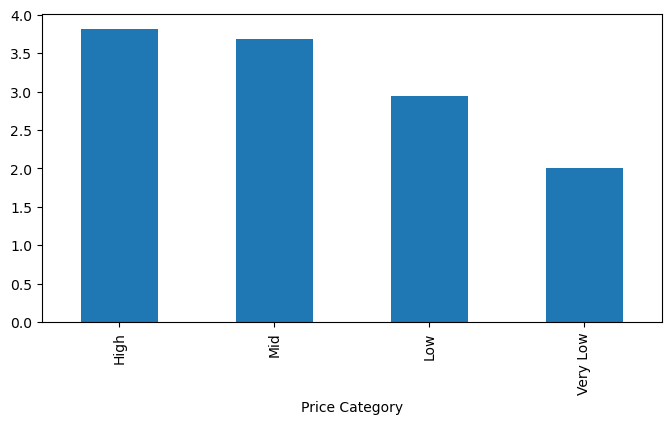

In [159]:
#Bining the 4 price point into different categories 
def price_range(points):
    if points <= 1:
        return 'Very Low'
    elif points <= 2:
        return 'Low'
    elif points <= 3:
        return 'Mid'
    else:
        return 'High'

#Apply the function to dataframe
df['Price Category'] = df['Price range'].apply(price_range)

#comparing avg ratings accross price categories 
avg_rating = df.groupby('Price Category')['Aggregate rating'].mean().sort_values(ascending = False)
print(f'Price range with the highest ratings: {avg_rating}')

#plot showing the distribution
plt.figure(figsize = (8,4))
avg_rating.plot(kind = 'bar')

<Axes: >

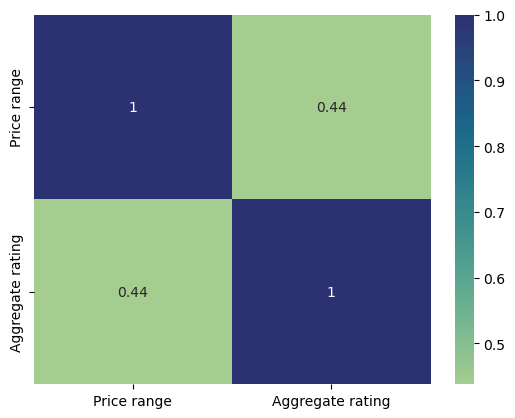

In [160]:
x = df[['Price range', 'Aggregate rating']]
corr = x.corr()
sns.heatmap(corr,cmap = 'crest', annot = True)

### Observations
1. High(4)  = 3.817918 'Highest Price Range'
2. Mid(3) = 3.682633
3. Low(2) = 2.941054
4. Very Low(1) = 1.997476

This means Higher Priced Cuisine tend to have higher rating than the lower Priced Cuisine

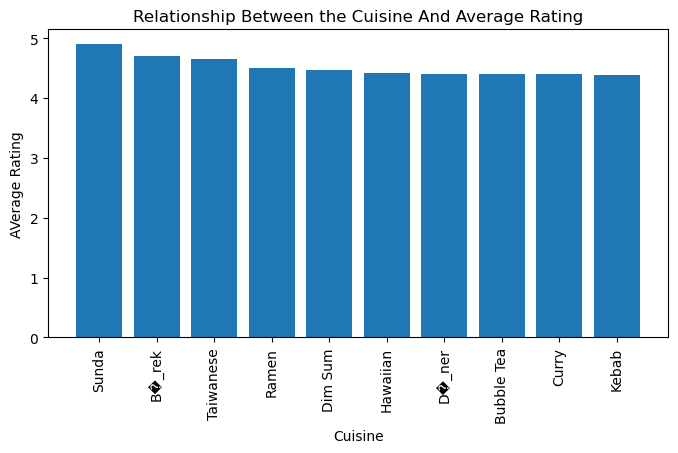

In [163]:
#Analyze relationships between cuisines and ratings.
df_drop= df_explode
cuisine_rating = df_drop.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).round(2).reset_index().head(10)
df_drop = df.dropna(subset=['Cuisines', 'Aggregate rating'])

#plot the relationships
plt.figure(figsize = (8,4))
plt.bar(cuisine_rating['Cuisines'], cuisine_rating['Aggregate rating'])
plt.title('Relationship Between the Cuisine And Average Rating' )
plt.xlabel('Cuisine')
plt.ylabel('AVerage Rating')
plt.xticks(rotation =90)

plt.show()


In [164]:
cuisine_rating.head(10)

,Cuisines,Aggregate rating
0,Sunda,4.90
1,B�_rek,4.70
2,Taiwanese,4.65
3,Ramen,4.50
4,Dim Sum,4.47
5,Hawaiian,4.41
6,D�_ner,4.40
7,Bubble Tea,4.40
8,Curry,4.40
9,Kebab,4.38


In [165]:
df_drop= df_explode

In [166]:
cuisine_ratings = df_drop.groupby('Cuisines')['Aggregate rating'].mean()

#highest and lowest rated cuisine 
highest_rated_cuisine = cuisine_ratings.idxmax()
lowest_rated_cuisine = cuisine_ratings.idxmin()

print(f'Highest Rated Cuisine: {highest_rated_cuisine}({cuisine_ratings.max():.2f})')
print(f'Lowest Rated Cuisine:{lowest_rated_cuisine}({cuisine_ratings.min():.2f})')

Highest Rated Cuisine: Sunda(4.90)
Lowest Rated Cuisine:Cuisine Varies(0.00)


### Observations:
1. Highest Rated Cuisine: Sunda = 4.90 
2. Lowest Rated Cuisine : Cuisine Varies = 0.00

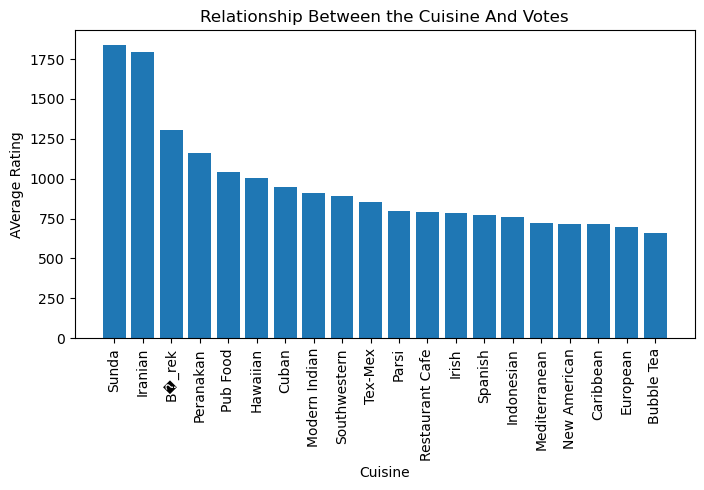

In [167]:
#Identify popular cuisines by votes.
cuisine_popularity = df_drop.groupby('Cuisines')['Votes'].mean().sort_values(ascending =False).reset_index().head(20)

#plot the relationships
plt.figure(figsize = (8,4))
plt.bar(cuisine_popularity['Cuisines'], cuisine_popularity['Votes'])
plt.title('Relationship Between the Cuisine And Votes' )
plt.xlabel('Cuisine')
plt.ylabel('AVerage Rating')
plt.xticks(rotation =90)

plt.show()

In [168]:
cuisine_popularity.head(10)

,Cuisines,Votes
0,Sunda,1838.000000
1,Iranian,1791.333333
2,B�_rek,1305.000000
3,Peranakan,1159.000000
4,Pub Food,1042.000000
5,Hawaiian,1001.500000
6,Cuban,946.000000
7,Modern Indian,911.312500
8,Southwestern,892.000000
9,Tex-Mex,851.105263


In [62]:
cuisine_popularity = df_drop.groupby('Cuisines')['Votes'].mean()

#highest and lowest voted cuisine 
highest_voted_cuisine = cuisine_popularity.idxmax()
lowest_voted_cuisine = cuisine_popularity.idxmin()

print(f'Highest Rated Cuisine: {highest_voted_cuisine}({cuisine_popularity.max():.2f})')
print(f'Lowest Rated Cuisine:{lowest_voted_cuisine}({cuisine_popularity.min():.2f})')

Highest Rated Cuisine: Sunda(1838.00)
Lowest Rated Cuisine:Cuisine Varies(2.00)


### Observations:
1. Highest voted cuisine is the "Sunda = 1838.00
2. Lowest Rated Cuisine is the "Cuisine Varies = 2.00

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64


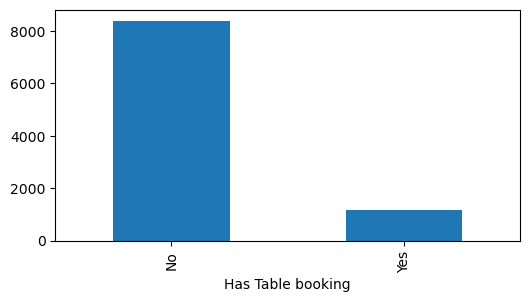

In [63]:
#Compare restaurants with and without table booking.
#What are the counts of each data present in this columns
Table_counts= df['Has Table booking'].value_counts()
df['Has Table booking'].value_counts(). plot(kind  = 'bar', figsize =(6,3))
print(Table_counts)

In [65]:
#comparing restaurants with and without table booking.
booking_ratings = df.groupby(['Restaurant Name', 'Has Table booking'])['Aggregate rating'].count().sort_values(ascending = True).unstack()
booking_ratings.head(10)

Has Table booking,No,Yes
Restaurant Name,,
#45,1.0,NaN
#Dilliwaala6,1.0,NaN
#InstaFreeze,1.0,NaN
#OFF Campus,NaN,1.0
#Urban Caf��,1.0,NaN
#hashtag,1.0,NaN
'Ohana,1.0,NaN
10 Downing Street,2.0,NaN
10 To 10 In Delhi,1.0,NaN


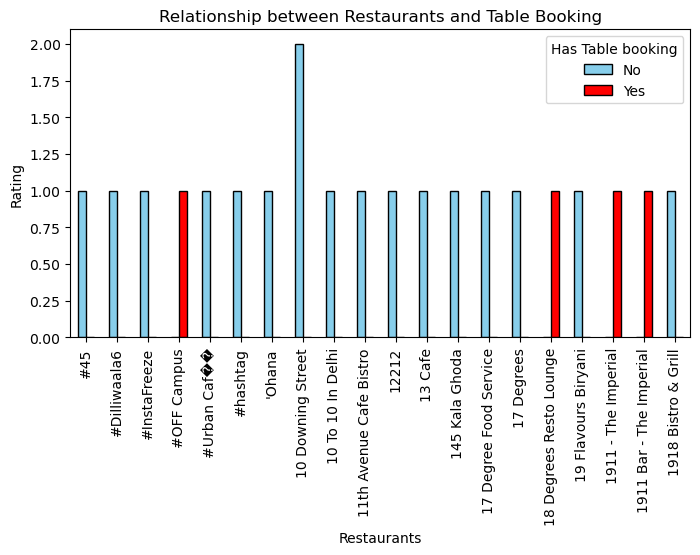

In [66]:
booking_ratings.head(20).plot(kind = 'bar', figsize =(8,4), color = ['skyblue', 'red'], edgecolor = 'black')
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.title("Relationship between Restaurants and Table Booking")
plt.show()

### Observations:
Most Restaurants don't have table booking
    
    1.No = 8393
    2.Yes = 1158

In [524]:
#Effects of ratings accross different cities andon table booking
booking_effect = df.groupby(['City', 'Has Table booking'])['Aggregate rating'].mean().sort_values(ascending = False).reset_index()
booking_effect.head(20)

Has Table booking,City,No,Yes
0,Abu Dhabi,4.235714,4.450000
1,Agra,3.965000,NaN
2,Ahmedabad,4.161905,NaN
3,Albany,3.555000,NaN
4,Allahabad,3.395000,NaN
5,Amritsar,3.685714,NaN
6,Ankara,4.305000,NaN
7,Armidale,3.500000,NaN
8,Athens,4.200000,NaN
9,Auckland,4.275000,NaN


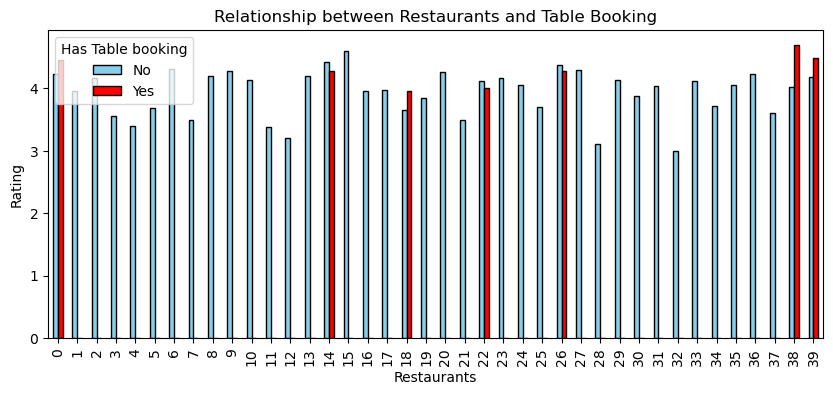

In [525]:
booking_effect.head(40).plot(kind = 'bar', figsize =(10,4), color = ['skyblue', 'red'], edgecolor = 'black')
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.title("Relationship between Restaurants and Table Booking")
plt.legend =(['No Booking Available', 'Booking Available'])
plt.show()

### Obsevations:
1. Countries/cities in Asia(Middle East) and in United Kingdom that has table booking has higher rating than other Countries/cities that has table booking as well

for example: Cape Town(South Africa), Bangalore(South Africa) has table booking, but does not reaaly affect the rating

Creating more opportunities to book tables in Asia, United Arab Emirate/Qatar would be appreciated there

<Axes: xlabel='No'>

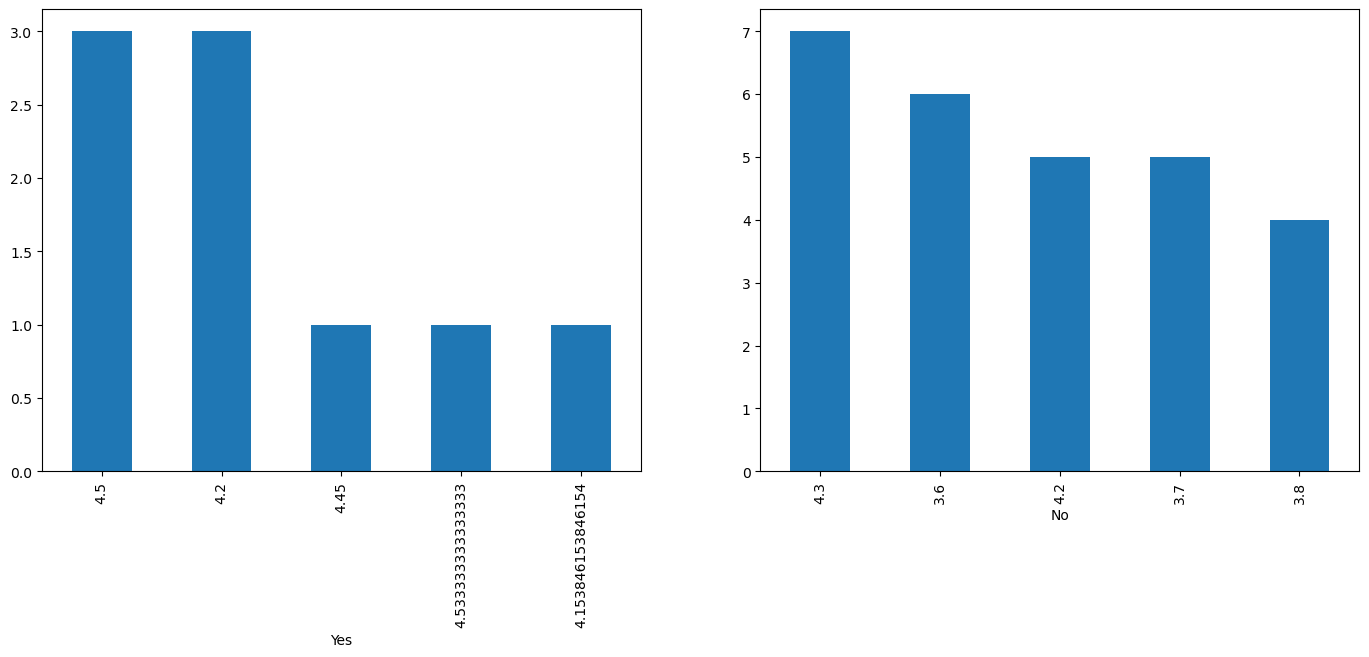

In [214]:
plt.subplot(1,2,1)
booking_effect['Yes'].value_counts().head().plot(kind = 'bar')

plt.subplot(1,2,2)
booking_effect['No'].value_counts().head().plot(kind = 'bar', figsize = (17,6))

In [215]:
#Calculate the Percentage of restaurants offering delivery
offering_delivery_percentage = (df['Has Online delivery'].eq('Yes').sum()/len(df) * 100)
print(f'Percentage of restaurants offering delivery : {offering_delivery_percentage: .2f}%')

Percentage of restaurants offering delivery :  25.66%


### Observations:
25.66% of restaurants offers delivery to their customers/users

<Axes: ylabel='Has Online delivery'>

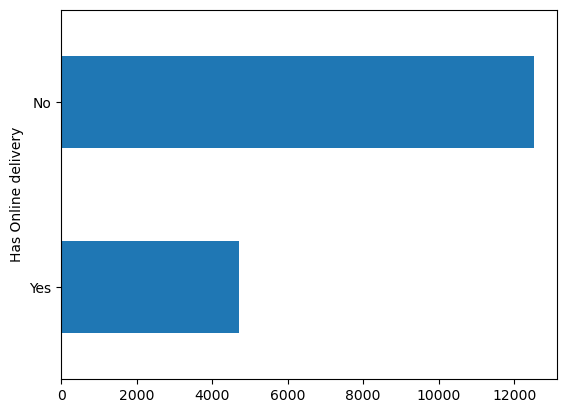

In [169]:
#Avalability accross different Price range
delivery_avalabilty = df.groupby('Has Online delivery')['Price range'].sum().sort_values(ascending = True) 
delivery_avalabilty.plot(kind = 'barh')

In [170]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors = 'coerce')

In [171]:
#Identify specific Cuisines that consistently receives higher ratings
rating = df.groupby(['Cuisines', 'Rating text'])['Aggregate rating'].mean().sort_values(ascending =False).reset_index()
rating.head(100)

,Cuisines,Rating text,Aggregate rating
0,"Sandwich, Seafood, Cajun",Excellent,4.9
1,"European, Contemporary",Excellent,4.9
2,International,Excellent,4.9
3,Steak,Excellent,4.9
4,"American, Sandwich, Tea",Excellent,4.9
...,...,...,...
95,"Pizza, Fast Food",Excellent,4.6
96,"American, Continental, Burger",Excellent,4.6
97,"Ramen, Japanese",Excellent,4.6
98,"Desserts, Bakery, Western",Excellent,4.6


## WEEK 4: Predictive Modeling
1. Extract additional features from existing columns. Create new features by encoding categorical variables.
2. Build regression models to predict restaurant ratings. Split data into training and testing sets.
3. Evaluate using RMSE, MAE, and R-squared. Compare different algorithms like linear regression and random forest.

## Feature Engineering

In [179]:
df_explode = df
df_explode = df_explode.assign(Cuisines = df_explode['Cuisines'].str.split(", ", regex =False)).explode('Cuisines').reset_index(drop=True)
df_explode['Cuisines'] = df_explode['Cuisines'].str.strip()

In [180]:
df_drop = df_explode

In [196]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant ID          19719 non-null  int64  
 1   Restaurant Name        19719 non-null  object 
 2   Country Code           19719 non-null  int64  
 3   City                   19719 non-null  object 
 4   Address                19719 non-null  object 
 5   Locality               19719 non-null  object 
 6   Locality Verbose       19719 non-null  object 
 7   Longitude              19719 non-null  float64
 8   Latitude               19719 non-null  float64
 9   Cuisines               19710 non-null  object 
 10  Average Cost for two   19719 non-null  int64  
 11  Currency               19719 non-null  object 
 12  Has Table booking      19719 non-null  object 
 13  Has Online delivery    19719 non-null  object 
 14  Is delivering now      19719 non-null  object 
 15  Sw

In [197]:
#There will be need to add countries to this dataframe
df2 = pd.read_excel('C:/Users/USER/DATA ANALYTICS TUTORIAL/Axia Cohort practice class/Emelu Onyebuchi Jeremiah Week 2/Country-Code.xlsx')

In [198]:
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [199]:
#Merge this column to original dataset
df3 = pd.merge(df_drop, df2, on= 'Country Code')
df3.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Price Category,Total_Reviews,Restaurant_name,Cuisine_popularity,Cuisine target,Locality_target,vote_log,Price_log,Price_per_person,City_Avg_Rating_log,Cuisine_frequency_log,Total_Reviews_log,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,1100,Botswana Pula(P),Yes,No,No,No,4.8,Dark Green,Excellent,Mid,314,4.8,0.001471,3.862069,4.8,5.752573,1.098612,6.311735,1.552868,3.367296,5.752573,Phillipines
1,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,1100,Botswana Pula(P),Yes,No,No,No,4.8,Dark Green,Excellent,Mid,314,4.8,0.006849,3.797037,4.8,5.752573,1.098612,6.311735,1.552868,4.905275,5.752573,Phillipines
2,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,1100,Botswana Pula(P),Yes,No,No,No,4.8,Dark Green,Excellent,Mid,314,4.8,0.033130,2.978867,4.8,5.752573,1.098612,6.311735,1.552868,6.481577,5.752573,Phillipines
3,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,4.5,Dark Green,Excellent,Mid,591,4.5,0.006849,3.797037,4.5,6.383507,1.098612,6.398595,1.552868,4.905275,6.383507,Phillipines
4,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,4000,Botswana Pula(P),Yes,No,No,No,4.4,Green,Very Good,High,270,4.4,0.008828,3.862069,4.4,5.602119,1.386294,7.601402,1.526056,5.159055,5.602119,Phillipines


In [182]:
restaurant_target_mean = df_explode.groupby('Restaurant Name')['Aggregate rating'].mean()

df_explode['Restaurant_name'] = df_explode['Restaurant Name'].map(restaurant_target_mean)


# 2 Restaurant popularity 
Cuisine_popularity = df_explode['Cuisines'].value_counts(normalize= True)

df_explode['Cuisine_popularity'] = df_explode['Cuisines'].map(Cuisine_popularity)


# Count the frequency of each cuisine
cuisine_counts = df_explode['Cuisines'].value_counts().to_dict()

#map frequency to dataframe
df_explode['Cuisine frequency'] = df_explode['Cuisines'].map(cuisine_counts)


cuisine_target = df_explode.groupby('Cuisines')['Aggregate rating'].mean().to_dict()

#map cuisine target to dataframe 
df_explode['Cuisine target'] = df_explode['Cuisines'].map(cuisine_target)


#Adding Price per one person
df_explode['Price per person'] = df_explode['Average Cost for two']/2


#rating based on cities
city_rating = df_explode.groupby('City')['Aggregate rating'].mean()

#map City rating to dataframe 
df_explode['City_Avg_Rating'] = df_explode['City'].map(city_rating)
                                                                  
Locality_target_mean = df_explode.groupby('Locality')['Aggregate rating'].mean()

#Total Reviews
df['Total_Reviews'] = df.groupby('Restaurant Name')['Votes'].transform('sum')

#map Locality rating to dataframe
df_explode['Locality_target'] = df_explode['Locality'].map(Locality_target_mean)

## Linear Regression Model

In [200]:
num_cl = df3.select_dtypes(np.number).columns
print(num_cl)

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Aggregate rating', 'Total_Reviews',
       'Restaurant_name', 'Cuisine_popularity', 'Cuisine target',
       'Locality_target', 'vote_log', 'Price_log', 'Price_per_person',
       'City_Avg_Rating_log', 'Cuisine_frequency_log', 'Total_Reviews_log'],
      dtype='object')


In [201]:
corr_val = df3[num_cl].corr()
corr_val.T

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Aggregate rating,Total_Reviews,Restaurant_name,Cuisine_popularity,Cuisine target,Locality_target,vote_log,Price_log,Price_per_person,City_Avg_Rating_log,Cuisine_frequency_log,Total_Reviews_log
Restaurant ID,1.000000,0.161160,-0.235158,-0.055187,-0.001903,-0.280462,-0.160273,-0.241126,-0.043966,0.087690,-0.166928,-0.371162,-0.125099,-0.213187,-0.009709,-0.075232,-0.346717
Country Code,0.161160,1.000000,-0.701606,-0.021789,0.042988,0.258688,-0.031198,0.271465,-0.278882,0.470621,0.365027,0.261064,0.191907,-0.563497,0.598239,-0.416154,0.147282
Longitude,-0.235158,-0.701606,1.000000,0.040942,0.047819,-0.099693,0.040096,-0.112417,0.195931,-0.338682,-0.208852,-0.097228,-0.046188,0.554268,-0.404346,0.289122,-0.020158
Latitude,-0.055187,-0.021789,0.040942,1.000000,-0.112444,-0.009916,-0.000991,-0.020252,0.068122,-0.110630,-0.106286,0.020158,-0.145029,-0.077237,-0.258149,0.112738,0.055976
Average Cost for two,-0.001903,0.042988,0.047819,-0.112444,1.000000,0.052105,0.013877,0.054908,-0.038531,0.084866,0.070478,0.067305,0.067671,0.266642,0.091313,-0.071401,0.046850
Aggregate rating,-0.280462,0.258688,-0.099693,-0.009916,0.052105,1.000000,0.164066,0.947837,-0.202628,0.372813,0.708682,0.833409,0.452195,0.132556,0.414794,-0.233747,0.658709
Total_Reviews,-0.160273,-0.031198,0.040096,-0.000991,0.013877,0.164066,1.000000,0.173095,-0.073244,0.103185,0.158441,0.274907,0.192360,0.151399,0.091582,-0.063125,0.535569
Restaurant_name,-0.241126,0.271465,-0.112417,-0.020252,0.054908,0.947837,0.173095,1.000000,-0.214156,0.391886,0.693229,0.808740,0.472654,0.137109,0.424055,-0.246846,0.694961
Cuisine_popularity,-0.043966,-0.278882,0.195931,0.068122,-0.038531,-0.202628,-0.073244,-0.214156,1.000000,-0.543511,-0.248836,-0.201221,-0.117822,0.135835,-0.247015,0.832786,-0.215891
Cuisine target,0.087690,0.470621,-0.338682,-0.110630,0.084866,0.372813,0.103185,0.391886,-0.543511,1.000000,0.444649,0.411337,0.452005,-0.019519,0.443394,-0.626982,0.318161


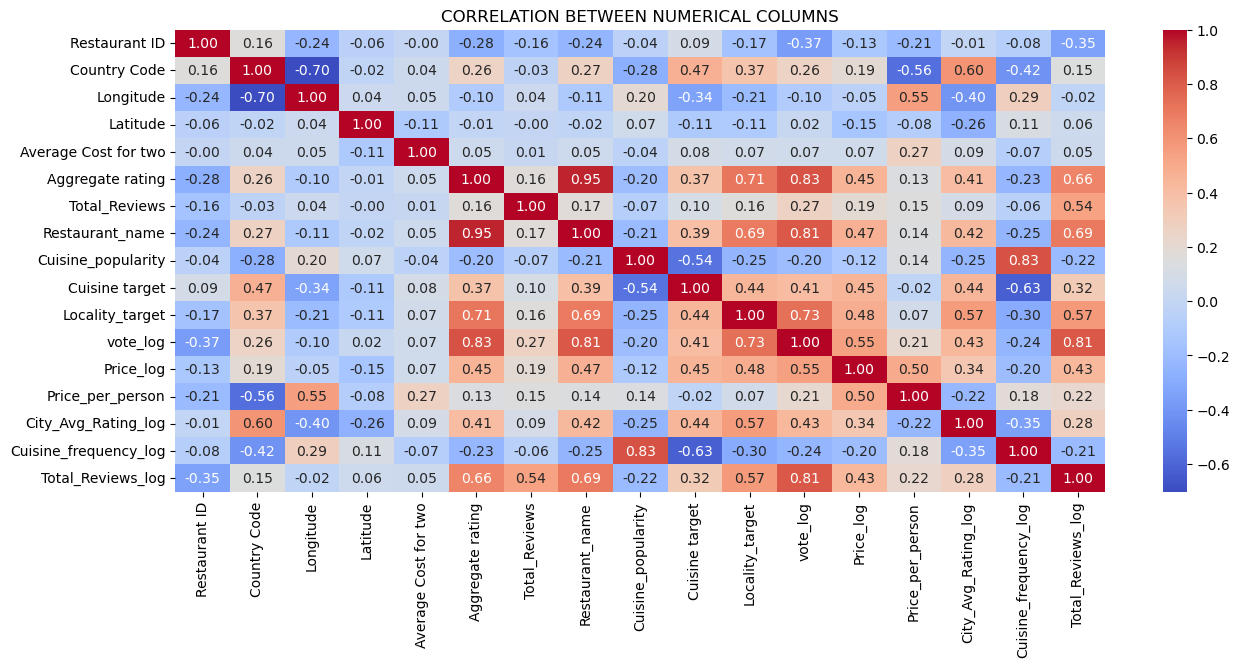

In [202]:
#plotting the heatmap to see their correlation before handling their skewness
plt.figure(figsize = (15,6))

sns.heatmap(corr_val, annot= True, cmap = 'coolwarm', fmt= '.2f')

plt.title('CORRELATION BETWEEN NUMERICAL COLUMNS')


plt.show()

In [195]:
#dropping uneccessary columns
df_drop = df_explode.drop(columns= [ 'Aggregate_log', 'Aggregate_log_rate', 'Aggregate_sqrt_rate', 'Votes', 'Price range', 'Price per person', 'City_Avg_Rating', 'Cuisine frequency', 'Cuisine_target_log'])

In [203]:
#Drop Unneccesary features
df3 = df3.drop(columns = [ 'Restaurant Name', 'Locality Verbose', 'Restaurant ID','Longitude', 'Latitude', 'Address', 'Rating color', 'Total_Reviews'])

### DATA SPLITTING

In [333]:
df = df.dropna(subset=['Cuisines'])

In [334]:
#Split the target and the predictors
X = df.drop(columns = ['Aggregate rating','Aggregate_log', 'Aggregate_log_rate', 'Aggregate_sqrt_rate'])
y = df['Aggregate rating']

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
print(f'{X_train.shape,y_train.shape}  \n {X_test.shape, y_test.shape}')

((7633, 22), (7633,))  
 ((1909, 22), (1909,))


In [338]:
num_co =X.select_dtypes(np.number).columns

### One Hot Encoder And StandardScaler

In [340]:
cat_col = ['Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating text', 'Price Category']
#num_col =['Total_Reviews_log', 'Restaurant_name', 'Country Code', 'Locality_target', 'Average Cost for two', 'Price_per_person', 'Price_log', 'vote_log', 'Cuisine target',  'City_Avg_Rating_log']

#preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#Create an encoder that removes the first category (to prevent multicollinearity)
encoder = OneHotEncoder(drop = 'first', handle_unknown= 'ignore')
# Encode categorical columns in training data
train_cat = encoder.fit_transform(X_train[cat_col])
# Transform categorical columns in test data using the same encoder
test_cat = encoder.transform(X_test[cat_col])


# # Create a scaler
scaler = StandardScaler()
# Scale numeric columns in training data
train_num = scaler.fit_transform(X_train[num_co])
# Scale numeric columns in test data using the same scaler
test_num = scaler.transform(X_test[num_co])

# Combine scaled numeric & encoded categorical data
train_processed = np.hstack((train_num,train_cat.toarray()))
test_processed = np.hstack((test_num,test_cat.toarray()))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [366]:
print(train_processed.shape, y_train.shape)
print(test_processed.shape, y_test.shape)

(7633, 1586) (7633,)
(1909, 1586) (1909,)


## Model Selection

In [343]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()
model

LinearRegression()

##### Model Evaluation

In [344]:
# Fit the model
model = model.fit(train_processed, y_train)

train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

In [345]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree
model2 = DecisionTreeRegressor()
model2

DecisionTreeRegressor()

##### Model Evaluation

In [346]:
model2 = model2.fit(train_processed, y_train)

train_pred2 = model2.predict(train_processed)
test_pred2 = model2.predict(test_processed)

In [347]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest
model3 = RandomForestRegressor()
model3

RandomForestRegressor()

##### Model Evaluation

In [348]:
model3 = model3.fit(train_processed, y_train)

train_pred3 = model3.predict(train_processed)
test_pred3 = model3.predict(test_processed)

## Model Performance

In [349]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### R2 SCORE

In [350]:
#r2 Score for Linear Regression
train_score = r2_score(train_pred,y_train)
test_score = r2_score(test_pred, y_test)

print(f'r2 Score LinearRegression: {train_score} ,  {test_score}')

r2 Score LinearRegression: 0.9890550202228502 ,  0.984867210362377


In [351]:
#For Decision Tress
train_score_DecisionTree = r2_score(train_pred2,y_train)
test_score_DecisionTree = r2_score(test_pred2, y_test)

print(f'r2 Score DecisionTree: {train_score_DecisionTree} , {test_score_DecisionTree}')

r2 Score DecisionTree: 1.0 , 0.978914662055995


In [352]:
#for random forest
train_score_RandomForest = r2_score(train_pred3,y_train)
test_score_RandomForest = r2_score(test_pred3, y_test)

print(f'r2 Score Randomforest: {train_score_RandomForest} , {test_score_RandomForest}')

r2 Score Randomforest: 0.998341943715709 , 0.9875565578493206


#### MEAN SQUARED ERROR

In [378]:
#mean_square_error
train_mse = mean_squared_error(train_pred, y_train)
test_mse = mean_squared_error(test_pred, y_test)

print(f'MeanSquareError LinearRegression: {train_mse} ,  {test_mse}')

MeanSquareError LinearRegression: 0.024924770194097345 ,  0.03404950801802918


In [354]:
#For Decision Tress
train_mse_DecisionTree = mean_squared_error(train_pred2, y_train)
test_mse_DecisionTree = mean_squared_error(test_pred2, y_test)

print(f'MeanSquareError DecisionTree: {train_mse_DecisionTree} ,  {test_mse_DecisionTree}')

MeanSquareError DecisionTree: 1.6820006855066116e-32 ,  0.04831849135673126


In [379]:
#For Random Forest
train_mse_Randomforest = mean_squared_error(train_pred3, y_train)
test_mse_Randomforest = mean_squared_error(test_pred3, y_test)

print(f'MeanSquareError RandomForest: {train_mse_Randomforest} ,  {test_mse_Randomforest}')

MeanSquareError RandomForest: 0.0037907193763919997 ,  0.028205658459926647


#### ROOT MEAN SQUARED

In [356]:
#mean_square_error
train_Rmse = np.sqrt(mean_squared_error(train_pred, y_train))
test_Rmse = np.sqrt(mean_squared_error(test_pred, y_test))

print(f'RootMeanSquareerror LinearRegression: {train_Rmse} ,  {test_Rmse}')

RootMeanSquareerror LinearRegression: 0.15787580623419584 ,  0.18452508777407256


In [357]:
#For Decision Tress
train_Rmse_DecisionTree = np.sqrt(mean_squared_error(train_pred2, y_train))
test_Rmse_DecisionTree = np.sqrt(mean_squared_error(test_pred2, y_test))

print(f'RootMeanSquareError DecisionTree: {train_Rmse_DecisionTree} ,  {test_Rmse_DecisionTree}')

RootMeanSquareError DecisionTree: 1.2969196912325033e-16 ,  0.2198146750258755


In [358]:
train_Rmse_Randomforest = np.sqrt(mean_squared_error(train_pred3, y_train))
test_Rmse_Randomforest = np.sqrt(mean_squared_error(test_pred3, y_test))

print(f'RootMeanSquareError RandomForest: {train_Rmse_Randomforest} ,  {test_Rmse_Randomforest}')

RootMeanSquareError RandomForest: 0.061568818215002305 ,  0.16794540321165877


In [380]:
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [ 0.01375875  0.00925412 -0.00259266 ... -0.00549172  0.00711196
 -0.00572399]
Intercept:  3.033829742341327


In [367]:
error = y_train - train_pred

In [370]:
prediction_table = pd.DataFrame({
    'Actual' : y_train,
    'Predicted' : train_pred,
    'Error' : error
})

In [371]:
prediction_table.head()

,Actual,Predicted,Error
8177,2.8,3.055273,-0.255273
6401,3.2,3.014069,0.185931
81,4.1,4.136151,-0.036151
1332,0.0,0.017447,-0.017447
9041,3.4,2.938501,0.461499


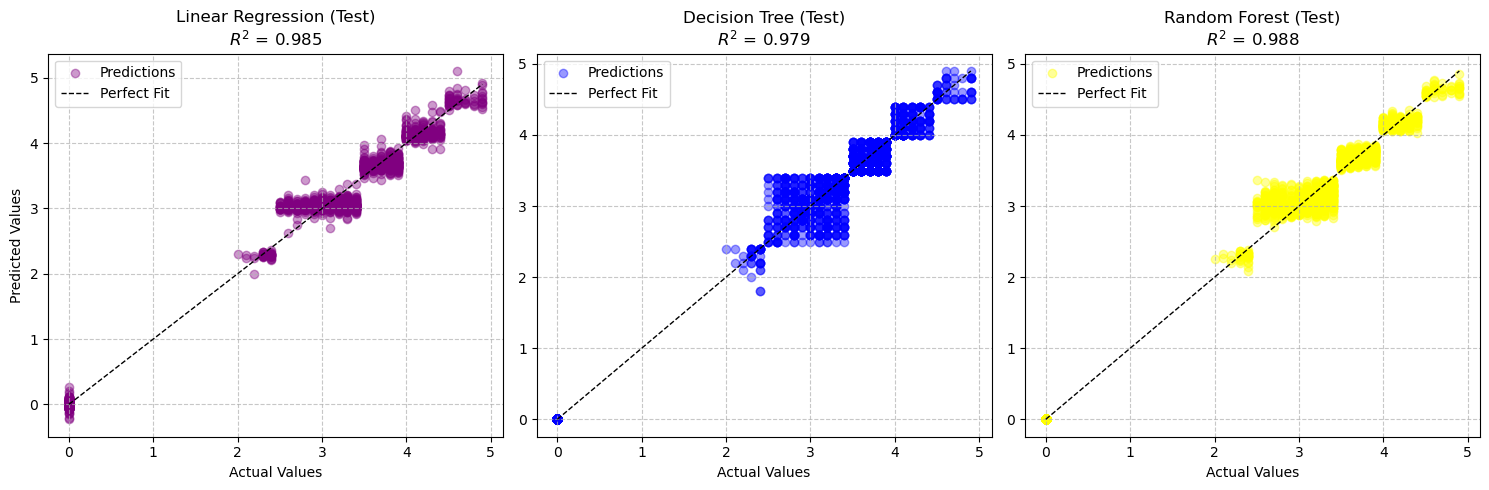

In [381]:
plt.figure (figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, test_pred, alpha=0.4, color='purple', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (Test)\n$R^2$ = {:.3f}'.format(r2_score(y_test, test_pred)))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Decision Tree

plt.subplot(1, 3, 2)
plt.scatter(y_test, test_pred2, alpha=0.4, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, label='Perfect Fit')
plt.xlabel('Actual Values')
plt.title('Decision Tree (Test)\n$R^2$ = {:.3f}'.format(r2_score(y_test, test_pred2)))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Random Forest

plt.subplot(1, 3, 3)
plt.scatter(y_test, test_pred3, alpha=0.4, color='yellow', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, label='Perfect Fit')
plt.xlabel('Actual Values')
plt.title('Random Forest (Test)\n$R^2$ = {:.3f}'.format(r2_score(y_test, test_pred3)))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()